# Материалы
* [Презентация](https://drive.google.com/file/d/1ueANgU-yn36WSoLGji5Yg8f1JGXWmcOY/view?usp=sharing)

# Анализ поведения игроков в игре "Космические братья" в зависимости от источника перехода.

**Цель исследования** — изучить влияние источника перехода в игру на поведение пользователей. Провести анализ данных, проверить статистические гипотезы и определить эффективность рекламных каналов.
**Ход исследования**: Работа пройдёт в несколько этапов:
* Загрузка и предобработка данных
* Исследовательский анализ
* Проверка статистических гипотез
* Презентация
* Дашборд

### Подготовка и предобработка данных

Для начала импортируем необходимые библиотеки:

In [1]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import datetime as dt
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import plotly.graph_objects as go

#### Загрузим датасеты из CSV-файлов и выведем общую информацию о них:

In [2]:
ad_costs = pd.read_csv('https://code.s3.yandex.net/datasets/ad_costs.csv')
game_actions = pd.read_csv('https://code.s3.yandex.net/datasets/game_actions.csv')
user_source = pd.read_csv('https://code.s3.yandex.net/datasets/user_source.csv')

In [3]:
ad_costs

,source,day,cost
0,facebook_ads,2020-05-03,935.882786
1,facebook_ads,2020-05-04,548.354480
2,facebook_ads,2020-05-05,260.185754
3,facebook_ads,2020-05-06,177.982200
4,facebook_ads,2020-05-07,111.766796
5,facebook_ads,2020-05-08,68.009276
6,facebook_ads,2020-05-09,38.723350
7,instagram_new_adverts,2020-05-03,943.204717
8,instagram_new_adverts,2020-05-04,502.925451
9,instagram_new_adverts,2020-05-05,313.970984


In [4]:
ad_costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   source  28 non-null     object 
 1   day     28 non-null     object 
 2   cost    28 non-null     float64
dtypes: float64(1), object(2)
memory usage: 800.0+ bytes


Видим, что в датасете содержится информация о четырёх рекламных источниках и стоимости кликов по ним. Типы столбцов — ``object`` и ``float64``. Можем заметить, что столбец с датой нуждается в переводе в формат ``datetime``.

In [5]:
game_actions.head()

,event_datetime,event,building_type,user_id,project_type
0,2020-05-04 00:00:01,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN
1,2020-05-04 00:00:03,building,assembly_shop,c07b1c10-f477-44dc-81dc-ec82254b1347,NaN
2,2020-05-04 00:00:16,building,assembly_shop,6edd42cc-e753-4ff6-a947-2107cd560710,NaN
3,2020-05-04 00:00:16,building,assembly_shop,92c69003-d60a-444a-827f-8cc51bf6bf4c,NaN
4,2020-05-04 00:00:35,building,assembly_shop,cdc6bb92-0ccb-4490-9866-ef142f09139d,NaN


In [6]:
game_actions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135640 entries, 0 to 135639
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   event_datetime  135640 non-null  object
 1   event           135640 non-null  object
 2   building_type   127957 non-null  object
 3   user_id         135640 non-null  object
 4   project_type    1866 non-null    object
dtypes: object(5)
memory usage: 5.2+ MB


Датасет содержит логи активностей пользователей, в нём 135640 строк. Все столбцы представлены типом ``object``. Как и в предыдущем датасете, необходим перевод столбца с датой в формат ``datetime``.

In [7]:
user_source.head()

,user_id,source
0,0001f83c-c6ac-4621-b7f0-8a28b283ac30,facebook_ads
1,00151b4f-ba38-44a8-a650-d7cf130a0105,yandex_direct
2,001aaea6-3d14-43f1-8ca8-7f48820f17aa,youtube_channel_reklama
3,001d39dc-366c-4021-9604-6a3b9ff01e25,instagram_new_adverts
4,002f508f-67b6-479f-814b-b05f00d4e995,facebook_ads


In [8]:
user_source.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13576 entries, 0 to 13575
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  13576 non-null  object
 1   source   13576 non-null  object
dtypes: object(2)
memory usage: 212.2+ KB


В этом датасете содержится информация о источниках рекламных переходов. Информация представлена о 13756 пользователях. Все столбцы представлены типом ``object``.

#### Проверим датасеты на наличие пропусков и дубликатов:

In [9]:
pd.DataFrame(round(ad_costs.isna().mean()*100,1)).style.background_gradient('coolwarm')

,0
source,0.000000
day,0.000000
cost,0.000000


In [10]:
pd.DataFrame(round(game_actions.isna().mean()*100,1)).style.background_gradient('coolwarm')

,0
event_datetime,0.000000
event,0.000000
building_type,5.700000
user_id,0.000000
project_type,98.600000


In [11]:
pd.DataFrame(round(user_source.isna().mean()*100,1)).style.background_gradient('coolwarm')

,0
user_id,0.000000
source,0.000000


Проверим датасет на "плохие" пропуски. Для начала проверим, встречаются ли в нём построенные здания без значения типа здания:

In [55]:
pd.DataFrame(round(game_actions[game_actions['event'] == 'building'].isna().mean()*100,1)).style.background_gradient('coolwarm')

,0
event_datetime,0.000000
event,0.000000
building_type,0.000000
user_id,0.000000
project_type,100.000000


Таких пропусков нет. Теперь проверим значения столбца ``event`` при пропусках в столбце ``building_type``.

In [63]:
# Фильтруем строки, где столбец building_type содержит пропуски
game_actions_non_building = game_actions[game_actions['building_type'].isnull()]

# Находим все уникальные значения столбца event в получившейся таблице
game_actions_non_building['event'].unique()

array(['finished_stage_1', 'project'], dtype=object)

Таким образом, пропуски в ``building_type`` встречаются только при исследованном проекте или по завершению уровня, что соответствует логике сбора данных.

Наконец, проверим, нет ли в логах построенных зданий при исследованном проекте:

In [64]:
pd.DataFrame(round(game_actions[game_actions['event'] == 'project'].isna().mean()*100,1)).style.background_gradient('coolwarm')

,0
event_datetime,0.000000
event,0.000000
building_type,100.000000
user_id,0.000000
project_type,0.000000


Значит, при законченном проекте построенные здания отсутствуют. \
Мы провели всестороннюю проверку "плохих" пропусков, и убедились что данные корректны и готовы к дальнейшему анализу.

In [12]:
ad_costs.duplicated().sum()

0

In [13]:
game_actions.duplicated().sum()

1

In [14]:
user_source.duplicated().sum()

0

В датасете ``game_actions`` содержался один дубликат, удалим его вместе с оригинальной строкой.

In [15]:
duplicate_mask = game_actions.duplicated(keep=False)

game_actions = game_actions[~duplicate_mask]

In [16]:
game_actions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 135638 entries, 0 to 135639
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   event_datetime  135638 non-null  object
 1   event           135638 non-null  object
 2   building_type   127955 non-null  object
 3   user_id         135638 non-null  object
 4   project_type    1866 non-null    object
dtypes: object(5)
memory usage: 6.2+ MB


#### Приведём столбцы с датой к формату datetime:

In [17]:
ad_costs['day'] = pd.to_datetime(ad_costs['day'])

In [18]:
game_actions['event_datetime'] = pd.to_datetime(game_actions['event_datetime'])

И посмотрим, информацией в каком диапазоне дат мы располагаем:

In [19]:
min_date_сosts = ad_costs['day'].min()
max_date_сosts = ad_costs['day'].max()

print('Минимальная дата:', min_date_сosts)
print('Максимальная дата:', max_date_сosts)

Минимальная дата: 2020-05-03 00:00:00
Максимальная дата: 2020-05-09 00:00:00


Таким образом, данные о покупке рекламы представлены в период с 3 по 9 мая 2020 года.

In [20]:
min_date_actions = game_actions['event_datetime'].min()
max_date_actions = game_actions['event_datetime'].max()

print('Минимальная дата:', min_date_actions)
print('Максимальная дата:', max_date_actions)

Минимальная дата: 2020-05-04 00:00:01
Максимальная дата: 2020-06-05 12:32:49


Данные о игровых активностях представлены в период с 4 мая по 5 июня 2020 года.

#### Вывод
В проекте представлены 3 датасета:
* С информацией о рекламных источниках и стоимости кликов по ним в период с 3 по 9 мая 2020 года
* С логами активностей пользователей в период с 4 мая по 5 июня 2020 года
* С информацией о источниках рекламных переходов 

Датасеты были проверены на пропуски и дубликаты. Пропуски были оставлены, т.к. они являются источником информации, дубликаты удалены. \
Столбцы с датой в двух датасетах приведены к формату ``datetime``.

### Исследовательский анализ данных

#### Объединение датасетов:

Для удобства в дальнейшем объединим датасеты ``game_actions`` и ``user_source`` в один:

In [21]:
# Присоединение таблиц по столбцу 'user_id'
merged_actions_source = game_actions.merge(user_source, on='user_id')

merged_actions_source.head()

,event_datetime,event,building_type,user_id,project_type,source
0,2020-05-04 00:00:01,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,youtube_channel_reklama
1,2020-05-05 05:20:15,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,youtube_channel_reklama
2,2020-05-05 19:24:02,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,youtube_channel_reklama
3,2020-05-05 20:59:19,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,youtube_channel_reklama
4,2020-05-06 00:52:56,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,youtube_channel_reklama


#### Посчитаем среднюю продолжительность игры в разбивке по рекламным каналам:

Для начала сформируем таблицу, вычислив для всех уникальных пользователей среднюю продолжительность игры:

In [22]:
# Группировка по 'user_id' и вычисление минимальной и максимальной даты для каждого пользователя
duration_df = merged_actions_source.groupby('user_id').agg({'event_datetime': ['min', 'max'], 'source': 'first'})

# Переименование столбцов
duration_df.columns = ['min', 'max', 'source']

# Вычисление продолжительности игры в часах
duration_df['duration_hours'] = (duration_df['max'] - duration_df['min']).dt.total_seconds() / 3600

In [23]:
duration_df.head()

,min,max,source,duration_hours
user_id,,,,
0001f83c-c6ac-4621-b7f0-8a28b283ac30,2020-05-06 01:07:37,2020-05-20 11:26:06,facebook_ads,346.308056
00151b4f-ba38-44a8-a650-d7cf130a0105,2020-05-06 03:09:12,2020-05-18 10:46:52,yandex_direct,295.627778
001aaea6-3d14-43f1-8ca8-7f48820f17aa,2020-05-05 18:08:52,2020-05-14 09:21:27,youtube_channel_reklama,207.209722
001d39dc-366c-4021-9604-6a3b9ff01e25,2020-05-05 21:02:05,2020-05-12 07:40:47,instagram_new_adverts,154.645000
002f508f-67b6-479f-814b-b05f00d4e995,2020-05-05 13:49:58,2020-05-22 02:46:45,facebook_ads,396.946389


Теперь сгруппируем получившуюся таблицу по рекламным источникам и вычислим среднюю продолжительность игры по каждому из них:

In [24]:
grouped_duration_source = duration_df.groupby('source')['duration_hours'].mean().round(2).sort_values(ascending=False)

grouped_duration_source

source
instagram_new_adverts      258.92
facebook_ads               257.56
yandex_direct              254.77
youtube_channel_reklama    254.08
Name: duration_hours, dtype: float64

И визуализируем результаты:

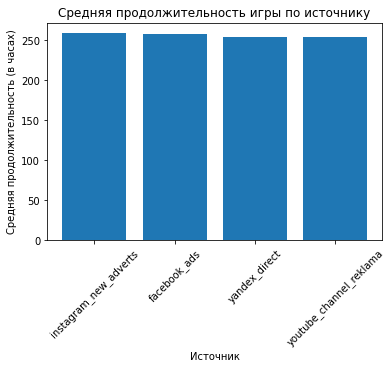

In [25]:
fig, ax = plt.subplots()

values = grouped_duration_source.values
labels = grouped_duration_source.index

ax.bar(labels, values)

ax.set_xlabel('Источник')
ax.set_ylabel('Средняя продолжительность (в часах)')
ax.set_title('Средняя продолжительность игры по источнику')

plt.xticks(rotation=45)

plt.show()

Видим, что средняя продолжительность игры пользователей в разбивке по рекламным источникам отличается незначительно.

#### Посчитаем количество построенных зданий в игре в разбивке по рекламных каналам:

Для этого посчитаем количество построенных зданий для каждого пользователя:

In [26]:
# Фильтрация событий построения здания
building_actions = merged_actions_source[merged_actions_source['event'] == 'building']

# Группировка и подсчет количества построенных зданий для каждого пользователя, включая столбец 'source'
building_count = building_actions.groupby(['user_id', 'source']).size().reset_index(name='building_count')

building_count.head()

,user_id,source,building_count
0,0001f83c-c6ac-4621-b7f0-8a28b283ac30,facebook_ads,13
1,00151b4f-ba38-44a8-a650-d7cf130a0105,yandex_direct,9
2,001aaea6-3d14-43f1-8ca8-7f48820f17aa,youtube_channel_reklama,4
3,001d39dc-366c-4021-9604-6a3b9ff01e25,instagram_new_adverts,8
4,002f508f-67b6-479f-814b-b05f00d4e995,facebook_ads,12


Затем вычислим среднее количество построенных зданий для каждого из рекламных каналов:

In [27]:
avg_building_count = building_count.groupby('source')['building_count'].mean().round(2).sort_values(ascending=False)

avg_building_count

source
facebook_ads               9.59
instagram_new_adverts      9.51
yandex_direct              9.35
youtube_channel_reklama    9.30
Name: building_count, dtype: float64

Затем визуализируем данную таблицу:

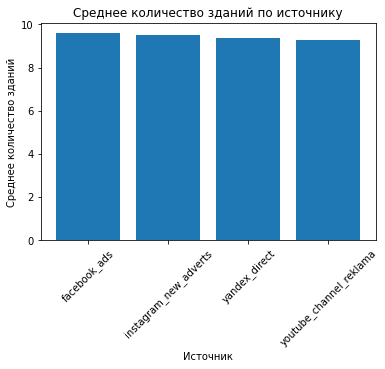

In [28]:
plt.bar(avg_building_count.index, avg_building_count.values)

plt.xlabel('Источник')
plt.ylabel('Среднее количество зданий')
plt.title('Среднее количество зданий по источнику')

plt.xticks(rotation=45)

plt.show()

Можем увидеть, что и количество построенных зданий по рекламным каналам отличается незначительно.

#### Посчитаем процент пользователей, прошедших первый уровень, в разбивке по рекламным каналам:

In [29]:
# Отфильтруем строки, где значение столбца 'event' равно 'finished_stage_1'
filtered_df = merged_actions_source[merged_actions_source['event'] == 'finished_stage_1']

# Рассчитаем количество пользователей, прошедших первый уровень по каждому из рекламных источников
users_count = filtered_df.groupby('source')['user_id'].nunique()

# Рассчитаем общее количество пользователей по каждому из рекламных источников
total_users_count = merged_actions_source.groupby('source')['user_id'].nunique()

# Рассчитаем процент пользователей, прошедших первый уровень, по каждому из рекламных источников
percentage_passed = (users_count / total_users_count) * 100

# Преобразуем Series в DataFrame, округлием значения до двух знаков после запятой и отсортируем результат по убыванию
percentage_passed = percentage_passed.to_frame(name='Percentage Passed').round(2).sort_values(by='Percentage Passed', ascending=False)

percentage_passed

,Percentage Passed
source,
instagram_new_adverts,43.80
youtube_channel_reklama,43.15
yandex_direct,42.39
facebook_ads,42.19


Построим график по данной таблице:

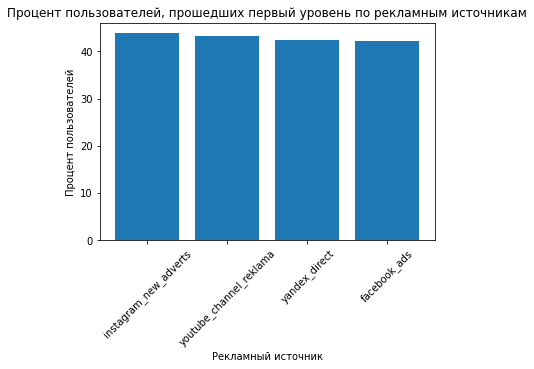

In [30]:
plt.bar(percentage_passed.index, percentage_passed['Percentage Passed'])

plt.xlabel('Рекламный источник')
plt.ylabel('Процент пользователей')
plt.title('Процент пользователей, прошедших первый уровень по рекламным источникам')

plt.xticks(rotation=45)

plt.show()

Как и в предыдущих случаях, эта метрика является примерно одинаковой у всех источников.

#### Расчёт САС по каналам привлечения.

Для расчёта САС сгруппируем данные по каналам и посчитаем стоимость привлечения по каждому их них:

In [31]:
# Группировка данных по каналам
actions_grouped = merged_actions_source.groupby('source')['user_id'].nunique().reset_index()
actions_grouped.columns=['source', 'users_count']
costs_grouped = ad_costs.groupby('source')['cost'].sum().reset_index()

# Объединение таблиц
combined_data = actions_grouped.merge(costs_grouped, on='source')

# Расчет САС
combined_data['CAC'] = (combined_data['cost'] / combined_data['users_count']).round(2)

# Вывод результатов
combined_data = combined_data.sort_values(by='CAC')
combined_data

,source,users_count,cost,CAC
3,youtube_channel_reklama,2686,1068.119204,0.40
2,yandex_direct,4817,2233.111449,0.46
1,instagram_new_adverts,3347,2161.441691,0.65
0,facebook_ads,2726,2140.904643,0.79


Из получившейся таблицы видно, что самая высокая стоимость привлечения пользователя — через facebook_ads: 0.79 у.е. \
Самая низкая — через youtube_channel_reklama: 0.4 у.е.

Теперь визуализируем данную таблицу:

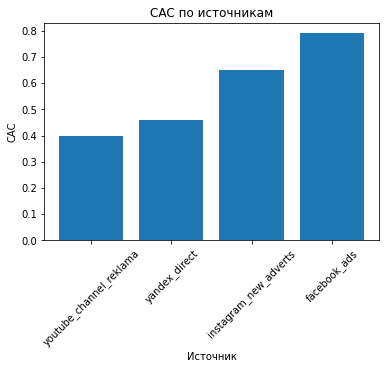

In [32]:
# Получение данных для построения диаграммы
sources = combined_data['source']
cac_values = combined_data['CAC']

# Создание графика
plt.bar(sources, cac_values)
plt.title('CAC по источникам')
plt.xlabel('Источник')
plt.ylabel('CAC') 
plt.xticks(rotation=45)  
plt.show()

#### Вывод:
Таким образом, можно сделать вывод, что хотя средняя продолжительность игры, процент пользователей, прошедших первый уровень, и количество построенных зданий не сильно различаются в зависимости от рекламных источников, стоимость привлечения пользователя варьируется значительно, и наиболее дорогостоящим способом является Facebook Ads (0.79 у.е.), а самым дешевым - YouTube Channel Reklama (0.4 у.е.).

### Проверка статистических гипотез:

#### Проверка гипотезы о различии времени завершения уровня в зависимости от способа прохождения (через реализацию проекта или победу над первым игроком).

Для начала найдём всех уникальных пользователей, прошедших первый уровень:

In [33]:
# Создание таблицы level_1_players
level_1_players = merged_actions_source[merged_actions_source['event'] == 'finished_stage_1']

# Нахождение времени первого события для каждого пользователя
first_event_dates = merged_actions_source.groupby('user_id')['event_datetime'].min().reset_index()
first_event_dates.columns = ['user_id', 'first_event_date']

# Объединение таблиц level_1_players и first_event_dates по user_id
level_1_players = level_1_players.merge(first_event_dates, on='user_id')

# Вычисление времени прохождения первого уровня в часах
level_1_players['time_to_complete_hours'] = (level_1_players['event_datetime'] - level_1_players['first_event_date']).dt.total_seconds() / 3600

In [34]:
level_1_players.head()

,event_datetime,event,building_type,user_id,project_type,source,first_event_date,time_to_complete_hours
0,2020-05-15 05:29:13,finished_stage_1,NaN,c07b1c10-f477-44dc-81dc-ec82254b1347,NaN,facebook_ads,2020-05-04 00:00:03,269.486111
1,2020-05-16 11:51:58,finished_stage_1,NaN,6edd42cc-e753-4ff6-a947-2107cd560710,NaN,instagram_new_adverts,2020-05-04 00:00:16,299.861667
2,2020-05-11 14:18:05,finished_stage_1,NaN,cdc6bb92-0ccb-4490-9866-ef142f09139d,NaN,yandex_direct,2020-05-04 00:00:35,182.291667
3,2020-05-16 13:08:11,finished_stage_1,NaN,4fe0f101-694b-4e31-9740-d1d87f7208ea,NaN,facebook_ads,2020-05-04 00:00:36,301.126389
4,2020-05-18 03:50:27,finished_stage_1,NaN,65a92713-5969-48b1-8945-bfefa5063887,NaN,yandex_direct,2020-05-04 00:00:44,339.828611


Теперь сформируем таблицу завершивших первый уровень через постройку орбитального комплекса:

In [35]:
pve_players = merged_actions_source[merged_actions_source['project_type'] == 'satellite_orbital_assembly']
pve_players = pve_players.merge(level_1_players, on='user_id')

In [36]:
pve_players.head()

,event_datetime_x,event_x,building_type_x,user_id,project_type_x,source_x,event_datetime_y,event_y,building_type_y,project_type_y,source_y,first_event_date,time_to_complete_hours
0,2020-05-13 06:53:03,project,NaN,c07b1c10-f477-44dc-81dc-ec82254b1347,satellite_orbital_assembly,facebook_ads,2020-05-15 05:29:13,finished_stage_1,NaN,NaN,facebook_ads,2020-05-04 00:00:03,269.486111
1,2020-05-18 02:18:19,project,NaN,65a92713-5969-48b1-8945-bfefa5063887,satellite_orbital_assembly,yandex_direct,2020-05-18 03:50:27,finished_stage_1,NaN,NaN,yandex_direct,2020-05-04 00:00:44,339.828611
2,2020-05-18 18:28:31,project,NaN,fa352362-d258-472c-b295-2796ccc39fa3,satellite_orbital_assembly,youtube_channel_reklama,2020-05-19 14:36:02,finished_stage_1,NaN,NaN,youtube_channel_reklama,2020-05-04 00:01:33,374.574722
3,2020-05-14 17:33:52,project,NaN,7b3b6554-7949-4065-9808-d6c79bdc2f58,satellite_orbital_assembly,instagram_new_adverts,2020-05-15 16:09:11,finished_stage_1,NaN,NaN,instagram_new_adverts,2020-05-04 00:02:56,280.104167
4,2020-05-14 02:32:42,project,NaN,b374304d-2f74-4cc1-a4e2-500da44a06c7,satellite_orbital_assembly,facebook_ads,2020-05-15 04:24:34,finished_stage_1,NaN,NaN,facebook_ads,2020-05-04 00:03:46,268.346667


И таблицу тех, кто прошёл первый уровень через победу над врагом:

In [37]:
pvp_players = level_1_players[~level_1_players['user_id'].isin(pve_players['user_id'])]

In [38]:
pvp_players.head()

,event_datetime,event,building_type,user_id,project_type,source,first_event_date,time_to_complete_hours
1,2020-05-16 11:51:58,finished_stage_1,NaN,6edd42cc-e753-4ff6-a947-2107cd560710,NaN,instagram_new_adverts,2020-05-04 00:00:16,299.861667
2,2020-05-11 14:18:05,finished_stage_1,NaN,cdc6bb92-0ccb-4490-9866-ef142f09139d,NaN,yandex_direct,2020-05-04 00:00:35,182.291667
3,2020-05-16 13:08:11,finished_stage_1,NaN,4fe0f101-694b-4e31-9740-d1d87f7208ea,NaN,facebook_ads,2020-05-04 00:00:36,301.126389
6,2020-05-12 18:19:19,finished_stage_1,NaN,9c200ece-3b74-44c4-8a3f-260f2486c5d7,NaN,facebook_ads,2020-05-04 00:02:24,210.281944
8,2020-05-11 21:12:29,finished_stage_1,NaN,02bf92c2-17a0-4156-be88-2054fb6b7421,NaN,yandex_direct,2020-05-04 00:03:10,189.155278


Запишем все значения времен прохождения в отдельные переменные:

In [39]:
pve_players_time = pve_players['time_to_complete_hours'].values
pvp_players_time = pvp_players['time_to_complete_hours'].values

Сформулируем нулевую гипотезу: \
H0: Среднее время завершения уровня одинаковое вне зависимости от способа прохождения. \
H1: Среднее время завершения уровня различается в зависимости от способа прохождения.

Для проверки гипотезы о равенстве средних двух генеральных совокупностей применим t-тест. Установим уровень значимости в 5%.

In [40]:
alpha = 0.05

t_value, p_value = stats.ttest_ind(pve_players_time, pvp_players_time, equal_var=False)

if p_value < alpha:
    print("Отвергаем нулевую гипотезу: средние значения выборок различаются.")
else:
    print("Не отвергаем нулевую гипотезу: нет значимого различия между средними значениями выборок.")
print("P-значение:", p_value)

Отвергаем нулевую гипотезу: средние значения выборок различаются.
P-значение: 5.708058235069386e-107


И для наглядности построим распределение времён прохождения с помощью гистограмм:

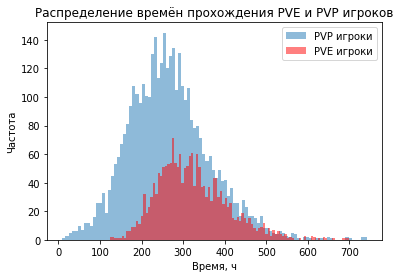

In [67]:
plt.hist(pvp_players_time, bins=100, alpha=0.5, label='PVP игроки')
plt.hist(pve_players_time, bins=100, alpha=0.5, label='PVE игроки', color='red')

plt.xlabel('Время, ч')
plt.ylabel('Частота')
plt.title('Распределение времён прохождения PVE и PVP игроков')

plt.legend()

plt.show()

Таким образом, существуют статистически значимые различия среднего времени прохождения между PVE и PVP игроками, на графике можем увидеть, что PVE игроки проходят игру заметно дольше.

#### Проверка второй гипотезы о различии времени завершения уровня в зависимости от рекламного канала:

Разделим времена прохождения игры пользователями имеющейся таблицы ``level_1_players`` по рекламным каналам:

In [42]:
level_1_players['source'].unique()

array(['facebook_ads', 'instagram_new_adverts', 'yandex_direct',
       'youtube_channel_reklama'], dtype=object)

In [43]:
# Создание четырех массивов данных в зависимости от значения столбца source
facebook_ads_data = level_1_players[level_1_players['source'] == 'facebook_ads']['time_to_complete_hours'].values
instagram_new_adverts_data = level_1_players[level_1_players['source'] == 'instagram_new_adverts']['time_to_complete_hours'].values
yandex_direct_data = level_1_players[level_1_players['source'] == 'yandex_direct']['time_to_complete_hours'].values
youtube_channel_reklama_data = level_1_players[level_1_players['source'] == 'youtube_channel_reklama']['time_to_complete_hours'].values

##### Cравнение facebook_ads и instagram_new_adverts.

Сформулируем нулевую гипотезу: \
H0: Среднее время завершения уровня одинаковое у пользователей, пришедших по каналам ``facebook_ads`` и ``instagram_new_adverts``. \
H1: Среднее время завершения уровня различается в зависимости от канала.
\
Для проверки гипотезы о равенстве средних двух генеральных совокупностей применим t-тест. Так как нам нужно провести 6 статистических тестов, необходимо сделать попраку на множественные сравнения. Установим уровень значимости alpha:

In [44]:
alpha = 0.05 / 6

In [45]:
t_value, p_value = stats.ttest_ind(facebook_ads_data, instagram_new_adverts_data, equal_var=False)

if p_value < alpha:
    print("Отвергаем нулевую гипотезу: средние значения выборок различаются.")
else:
    print("Не отвергаем нулевую гипотезу: нет значимого различия между средними значениями выборок.")
print("P-значение:", p_value)

Не отвергаем нулевую гипотезу: нет значимого различия между средними значениями выборок.
P-значение: 0.8165458824992216


Таким образом, не удалось установить статистически значимой разницы между временами прохождения игры пользователями, пришедшими по каналам ``facebook_ads`` и ``instagram_new_adverts``.

##### Cравнение facebook_ads и yandex_direct.

Сформулируем нулевую гипотезу: \
H0: Среднее время завершения уровня одинаковое у пользователей, пришедших по каналам ``facebook_ads`` и ``yandex_direct``. \
H1: Среднее время завершения уровня различается в зависимости от канала.
\
Для проверки гипотезы о равенстве средних двух генеральных совокупностей применим t-тест. Так как нам нужно провести 6 статистических тестов, необходимо сделать попраку на множественные сравнения. Установим прежний уровень значимости alpha:

In [46]:
t_value, p_value = stats.ttest_ind(facebook_ads_data, yandex_direct_data, equal_var=False)

if p_value < alpha:
    print("Отвергаем нулевую гипотезу: средние значения выборок различаются.")
else:
    print("Не отвергаем нулевую гипотезу: нет значимого различия между средними значениями выборок.")
print("P-значение:", p_value)

Не отвергаем нулевую гипотезу: нет значимого различия между средними значениями выборок.
P-значение: 0.7415720672022394


Таким образом, не удалось установить статистически значимой разницы между временами прохождения игры пользователями, пришедшими по каналам ``facebook_ads`` и ``yandex_direct``.

##### Cравнение facebook_ads и youtube_channel_reklama.

Сформулируем нулевую гипотезу: \
H0: Среднее время завершения уровня одинаковое у пользователей, пришедших по каналам ``facebook_ads`` и ``youtube_channel_reklama``. \
H1: Среднее время завершения уровня различается в зависимости от канала.
\
Для проверки гипотезы о равенстве средних двух генеральных совокупностей применим t-тест. Так как нам нужно провести 6 статистических тестов, необходимо сделать попраку на множественные сравнения. Установим прежний уровень значимости alpha:

In [47]:
t_value, p_value = stats.ttest_ind(facebook_ads_data, youtube_channel_reklama_data, equal_var=False)

if p_value < alpha:
    print("Отвергаем нулевую гипотезу: средние значения выборок различаются.")
else:
    print("Не отвергаем нулевую гипотезу: нет значимого различия между средними значениями выборок.")
print("P-значение:", p_value)

Не отвергаем нулевую гипотезу: нет значимого различия между средними значениями выборок.
P-значение: 0.7702332950180901


Таким образом, не удалось установить статистически значимой разницы между временами прохождения игры пользователями, пришедшими по каналам ``facebook_ads`` и ``youtube_channel_reklama``.

##### Cравнение instagram_new_adverts и yandex_direct.

Сформулируем нулевую гипотезу: \
H0: Среднее время завершения уровня одинаковое у пользователей, пришедших по каналам ``instagram_new_adverts`` и ``yandex_direct``. \
H1: Среднее время завершения уровня различается в зависимости от канала.
\
Для проверки гипотезы о равенстве средних двух генеральных совокупностей применим t-тест. Так как нам нужно провести 6 статистических тестов, необходимо сделать попраку на множественные сравнения. Установим прежний уровень значимости alpha:

In [48]:
t_value, p_value = stats.ttest_ind(instagram_new_adverts_data, yandex_direct_data, equal_var=False)

if p_value < alpha:
    print("Отвергаем нулевую гипотезу: средние значения выборок различаются.")
else:
    print("Не отвергаем нулевую гипотезу: нет значимого различия между средними значениями выборок.")
print("P-значение:", p_value)

Не отвергаем нулевую гипотезу: нет значимого различия между средними значениями выборок.
P-значение: 0.5336764127763518


Таким образом, не удалось установить статистически значимой разницы между временами прохождения игры пользователями, пришедшими по каналам ``instagram_new_adverts`` и ``yandex_direct``.

##### Cравнение instagram_new_adverts и youtube_channel_reklama.

Сформулируем нулевую гипотезу: \
H0: Среднее время завершения уровня одинаковое у пользователей, пришедших по каналам ``instagram_new_adverts`` и ``youtube_channel_reklama``. \
H1: Среднее время завершения уровня различается в зависимости от канала.
\
Для проверки гипотезы о равенстве средних двух генеральных совокупностей применим t-тест. Так как нам нужно провести 6 статистических тестов, необходимо сделать попраку на множественные сравнения. Установим прежний уровень значимости alpha:

In [49]:
t_value, p_value = stats.ttest_ind(instagram_new_adverts_data, youtube_channel_reklama_data, equal_var=False)

if p_value < alpha:
    print("Отвергаем нулевую гипотезу: средние значения выборок различаются.")
else:
    print("Не отвергаем нулевую гипотезу: нет значимого различия между средними значениями выборок.")
print("P-значение:", p_value)

Не отвергаем нулевую гипотезу: нет значимого различия между средними значениями выборок.
P-значение: 0.9384262310862282


Таким образом, не удалось установить статистически значимой разницы между временами прохождения игры пользователями, пришедшими по каналам ``instagram_new_adverts`` и ``youtube_channel_reklama``.

##### Cравнение yandex_direct и youtube_channel_reklama.

Сформулируем нулевую гипотезу: \
H0: Среднее время завершения уровня одинаковое у пользователей, пришедших по каналам ``yandex_direct`` и ``youtube_channel_reklama``. \
H1: Среднее время завершения уровня различается в зависимости от канала.
\
Для проверки гипотезы о равенстве средних двух генеральных совокупностей применим t-тест. Так как нам нужно провести 6 статистических тестов, необходимо сделать попраку на множественные сравнения. Установим прежний уровень значимости alpha:

In [50]:
t_value, p_value = stats.ttest_ind(yandex_direct_data, youtube_channel_reklama_data, equal_var=False)

if p_value < alpha:
    print("Отвергаем нулевую гипотезу: средние значения выборок различаются.")
else:
    print("Не отвергаем нулевую гипотезу: нет значимого различия между средними значениями выборок.")
print("P-значение:", p_value)

Не отвергаем нулевую гипотезу: нет значимого различия между средними значениями выборок.
P-значение: 0.5084859008473895


Таким образом, не удалось установить статистически значимой разницы между временами прохождения игры пользователями, пришедшими по каналам ``yandex_direct`` и ``youtube_channel_reklama``.

#### Вывод

Результаты A/B тестов позволяют сделать вывод о наличии статистически значимых различий во временах прохождения игры между PVE и PVP игроками. Однако, выбранные каналы привлечения пользователей не оказывают статистически значимого влияния на время прохождения игры.

### Общий вывод

* Средняя продолжительность игры, процент пользователей, прошедших первый уровень и количество построенных зданий не сильно различаются в зависимости от рекламных источников.

* Стоимость привлечения пользователя варьируется значительно в зависимости от рекламного канала. Наиболее дорогостоящим способом является Facebook Ads (0.79 у.е.), а самым дешевым - YouTube Channel Reklama (0.4 у.е.).

* Результаты A/B тестов показывают статистически значимые различия во временах прохождения игры между PVE и PVP игроками. Однако выбранные каналы привлечения пользователей не оказывают статистически значимого влияния на время прохождения игры.

* Таким образом, основным различием между рекламными каналами является стоимость привлечения игроков. Поэтому для ранжирования каналов по эффективности ключевой метрикой будет являться САС (стоимость привлечения одного пользователя).

* Наилучшей стратегией будет вкладываться в рекламные каналы, которые позволяют привлекать игроков дешевле. Исходя из представленных данных, YouTube Channel Reklama является наиболее эффективным каналом с самой низкой стоимостью привлечения пользователя (0.4 у.е.), а Facebook Ads - наиболее дорогостоящим (0.79 у.е.).

Полная таблица приоритизации рекламных каналов по эффективности выглядит следующим образом (согласно стоимости привлечения одного пользователя):
1. youtube_channel_reklama	
1. yandex_direct
1. instagram_new_adverts
1. facebook_ads